In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'test.csv', 'train.csv']


In [13]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
train['Title'] = train['Name']
test['Title'] = test['Name']

train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry"


In [16]:
import re
title = re.compile('\w+\.')

for i, row in train.iterrows():
    t = title.findall(row['Title'])
    train.at[i,'Title'] = t[0]
    
for i, row in test.iterrows():
    t = title.findall(row['Title'])
    test.at[i,'Title'] = t[0]


In [17]:
# Only Mr, Mrs, Miss and Master are in significant numbers - clump everyone else into a 5th category
for i, row in train.iterrows():
    if not(row['Title'] == 'Mr.' or row['Title'] == 'Mrs.' or row['Title'] == 'Miss.' or row['Title'] == 'Master.'):
        train.at[i, 'Title'] = 'Other'
    
for i, row in test.iterrows():
    if not(row['Title'] == 'Mr.' or row['Title'] == 'Mrs.' or row['Title'] == 'Miss.' or row['Title'] == 'Master.'):
        test.at[i, 'Title'] = 'Other'
    

In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


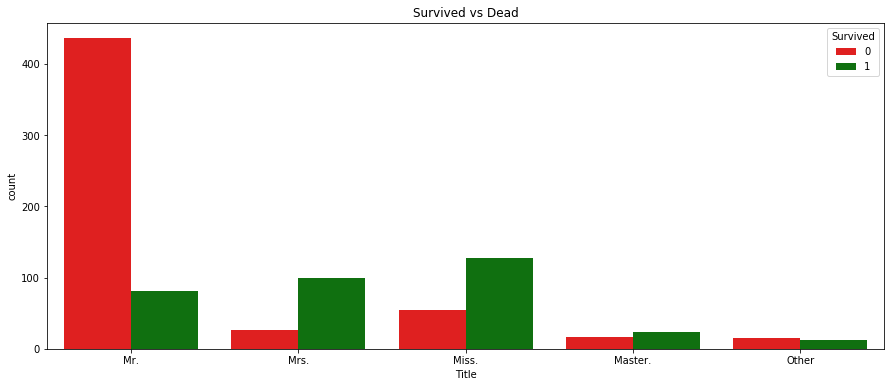

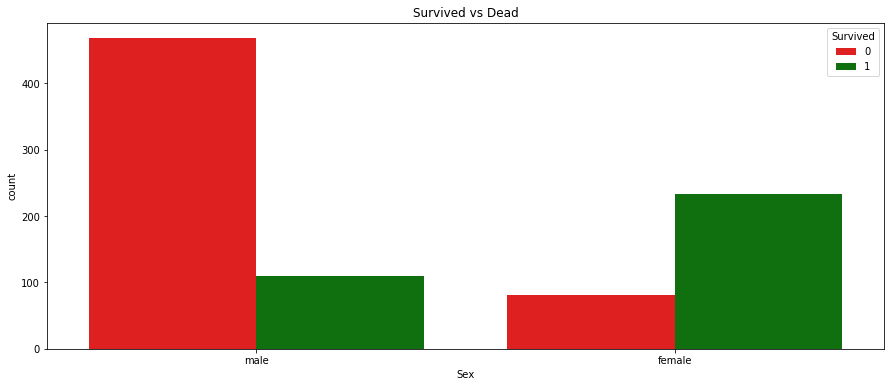

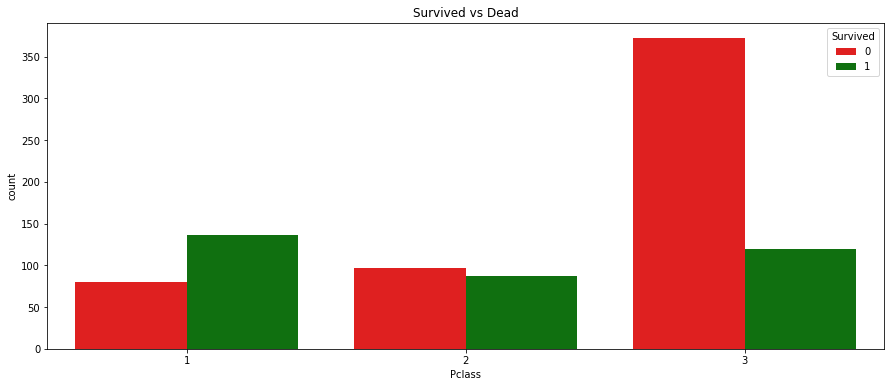

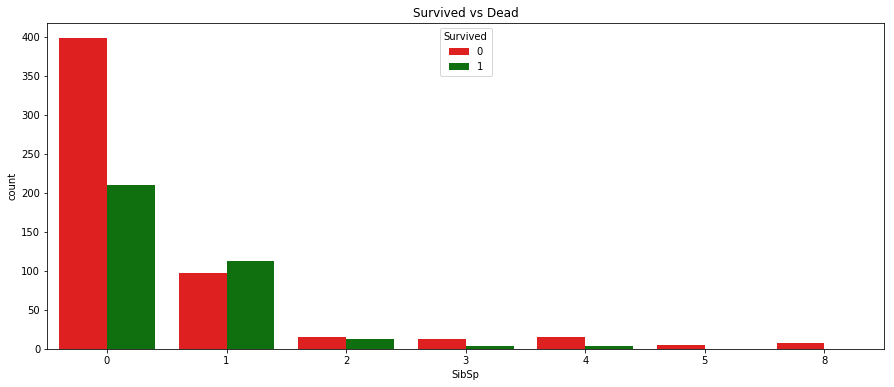

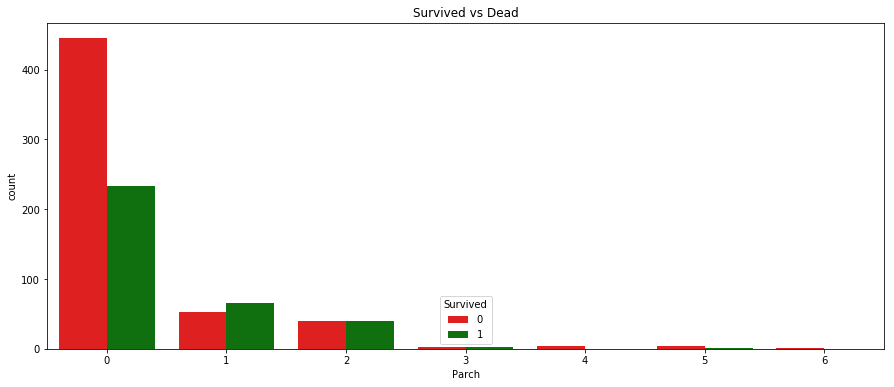

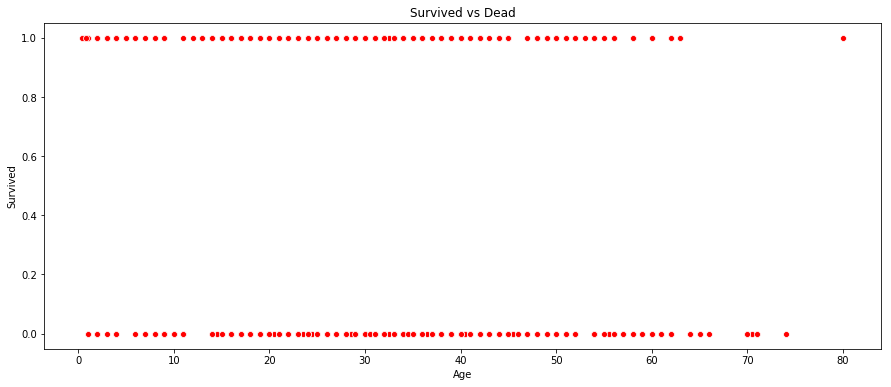

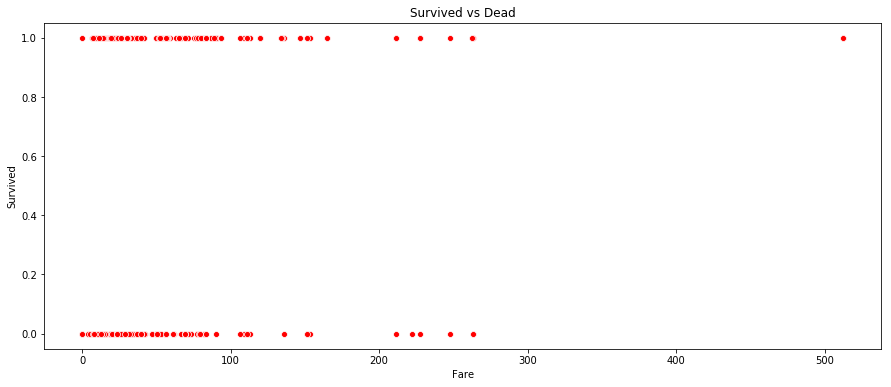

In [19]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
def plot(feature):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    #ax1 = plt.subplot(1, 2, 1)
    sns.set_palette(sns.color_palette(['r', 'g']))
    sns.countplot(hue='Survived', x=feature, data=train)
    #sns.countplot(train[feature][train.Survived == 1],ax=ax, color='g')
    #sns.countplot(train[feature][train.Survived == 0],ax=ax, color='r')
    plt.title('Survived vs Dead')
    #ax2 = plt.subplot(1, 2, 2)
    #sns.countplot(train[feature][train.Survived == 0],ax=ax2)
    #plt.title('Dead')
    
    #alive = train[train['Survived'] == 1][feature].value_counts()
    #dead = train[train['Survived'] == 0][feature].value_counts()
    #df = pd.DataFrame([alive, dead])
    #df.index = ['Survived', 'Dead']
    #df.plot(kind='bar', stacked=True, figsize=(10,5))
    
def plot_scatter(feature):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    #sns.set_palette(sns.color_palette(['r', 'g']))
    sns.scatterplot(x=feature, y='Survived', data=train, palette=['r','g'])
    plt.title('Survived vs Dead')
    
plot('Title')
plot('Sex')
plot('Pclass')
plot('SibSp')
plot('Parch')
plot_scatter('Age')
plot_scatter('Fare')

In [34]:
# Not considering Age as it has null values
X_train = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Title']]
y_train = train['Survived']
X_test = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Title']]

In [35]:
X_train.shape

(891, 5)

In [36]:
y_train.shape

(891,)

In [37]:
# convert categorical variable 'sex' to numeric
#X_train['Sex_num'] = X_train['Sex'].apply(lambda x : 1 if x == "male" else 0)
#X_test['Sex_num'] = X_test['Sex'].apply(lambda x : 1 if x == "male" else 0)

X_train = pd.get_dummies(X_train, columns=['Sex'])
X_test = pd.get_dummies(X_test, columns=['Sex'])
X_train = pd.get_dummies(X_train, columns=['Title'])
X_test = pd.get_dummies(X_test, columns=['Title'])


In [38]:
X_test.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Other
0,3,0,0,0,1,0,0,1,0,0
1,3,1,0,1,0,0,0,0,1,0
2,2,0,0,0,1,0,0,1,0,0
3,3,0,0,0,1,0,0,1,0,0
4,3,1,1,1,0,0,0,0,1,0


In [39]:
# Topological analysis

#X_train.drop(columns=['Sex'], axis=1, inplace=True)
#X_train.head()
#X_test.drop(columns=['Sex'], axis=1, inplace=True)
#X_test.head()


In [40]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#X_train.isnull()
null_data = X_train[X_train.isnull().any(axis=1)]
null_data

,Pclass,SibSp,Parch,Sex_female,Sex_male,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Other


In [63]:
# Cross val
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

xtr, xts, ytr, yts = train_test_split(X_train, y_train, test_size=0.2)
model = RandomForestClassifier(n_estimators=100)
model.fit(xtr, ytr)
model.score(xts, yts)

0.7821229050279329

In [66]:
# Cross val
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

xtr, xts, ytr, yts = train_test_split(X_train, y_train, test_size=0.2)
model = SVC(gamma='auto')
model.fit(xtr, ytr)
model.score(xts, yts)

0.8770949720670391

In [67]:
#model = RandomForestClassifier(n_estimators=100)
model = SVC(gamma='auto')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
predictions = model.predict(X_test)

In [69]:
predictionsDF = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : predictions})

In [70]:
predictionsDF.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [71]:
predictionsDF.to_csv("titanic_submission.csv", index=False)